In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport numpy as np\n%matplotlib inline\n'

Load the Dataset

In [2]:

df_perfumes = pd.read_csv("https://raw.githubusercontent.com/rawanalqarni/Perfumes_Recommender/main/Datasets/Perfume_Dataset.csv")

In [3]:
# Questions
# Timeline of the top brands (yearly or based on the fragrance family)
# Most selled perfumes based on Gender
# Focus on the top brands and see their rating performance overtime and why their rating ggot better
# Compare the prices with the base notes/Fragrance Family of the perfume
# Compare the prices with the rating of the brand

Check that the Dataset was loaded Correctly

In [4]:
df_perfumes.sample()

,Name,Price,Description,Rate,Rating_count,Details,image,Brand,Gender,Product_Type,Character,Fragrance_Family,Size,Year,Ingredients,Concentration,Top_note,Middle_note,Base_note
2124,Arabiyat Al Faris Concentrated Perfume Oil,25 SAR,A concentrated perfume oil for both men and wo...,none,none,"['Arabiyat', 'Unisex', 'Perfume Oil', 'Natural...",https://assets.goldenscent.com/catalog/product...,Arabiyat,Unisex,Perfume Oil,Natural,Arabian,12 ml,NaN,"Oriental notes, Aromatic notes, oriental notes",Perfume Oil,Oriental notes,Aromatic,Oriental


Check the shape of the Dataset

In [5]:
df_perfumes.shape

(6237, 19)

Check the Number of Missing Values in Each Column

In [6]:
df_perfumes.isna().sum()

Name                   0
Price                  0
Description          109
Rate                 109
Rating_count         114
Details              115
image                115
Brand                404
Gender               317
Product_Type         618
Character            870
Fragrance_Family     631
Size                 641
Year                2015
Ingredients          758
Concentration       1361
Top_note             929
Middle_note         1235
Base_note           1273
dtype: int64

In [7]:
df_perfumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              6237 non-null   object
 1   Price             6237 non-null   object
 2   Description       6128 non-null   object
 3   Rate              6128 non-null   object
 4   Rating_count      6123 non-null   object
 5   Details           6122 non-null   object
 6   image             6122 non-null   object
 7   Brand             5833 non-null   object
 8   Gender            5920 non-null   object
 9   Product_Type      5619 non-null   object
 10  Character         5367 non-null   object
 11  Fragrance_Family  5606 non-null   object
 12  Size              5596 non-null   object
 13  Year              4222 non-null   object
 14  Ingredients       5479 non-null   object
 15  Concentration     4876 non-null   object
 16  Top_note          5308 non-null   object
 17  Middle_note   

**Drop the Image Attribute**

In [8]:
df_perfumes.drop(['image','Description'], inplace=True, axis=1)

In [9]:
df_perfumes.sample()

,Name,Price,Rate,Rating_count,Details,Brand,Gender,Product_Type,Character,Fragrance_Family,Size,Year,Ingredients,Concentration,Top_note,Middle_note,Base_note
4942,Boucheron Santal De Kandy,1024 SAR,none,none,"['Boucheron', 'Unisex', 'Perfume', 'Glamorous'...",Boucheron,Unisex,Perfume,Glamorous,Woody Oriental,125 ml,2018,"Cardamom, black pepper, violet, jasmine, cedar...",Eau de Parfum,"Cardamom, black pepper","Cedar wood, guaiac wood",musk


Portray the Number of Duplicated Values

In [10]:
df_perfumes.duplicated().sum()

34

Drop the Duplicated Rows

In [11]:
df_perfumes.drop(df_perfumes[df_perfumes.duplicated()].index, inplace = True)

Number of Rows with 10 or More Missing Column Values

In [12]:
len(df_perfumes[df_perfumes.isnull().sum(axis=1) >= 10])

307

Drop the Rows with 10 or More Missing Columns

In [13]:
df_perfumes.drop(df_perfumes[df_perfumes.isnull().sum(axis=1) >= 10].index, inplace = True)

In [14]:
df_perfumes.shape

(5896, 17)

**Check & Clean the Rating Count Attribute**

In [15]:
df_perfumes['Rating_count'].value_counts()

none         5354
1 Rating      321
2 Rating      108
3 Rating       54
4 Rating       25
5 Rating        9
6 Rating        8
8 Rating        6
7 Rating        4
18 Rating       3
13 Rating       2
17 Rating       1
12 Rating       1
Name: Rating_count, dtype: int64

Remove the String 'Rating' from the Rating_count entries

In [16]:
df_perfumes['Rating_count'] = df_perfumes['Rating_count'].str.replace('Rating', '')

In [17]:
df_perfumes['Rating_count'] = df_perfumes['Rating_count'].str.replace('none', '0')

In [18]:
#The ones that dont have a rating also dont have any rating counts
len(df_perfumes[(df_perfumes['Rating_count'] == 'none') & (df_perfumes['Rate'] == 'none')])

0

In [19]:
df_perfumes['Rating_count'].value_counts()

0      5354
1       321
2       108
3        54
4        25
5         9
6         8
8         6
7         4
18        3
13        2
17        1
12        1
Name: Rating_count, dtype: int64

In [20]:
df_perfumes.head(2)

,Name,Price,Rate,Rating_count,Details,Brand,Gender,Product_Type,Character,Fragrance_Family,Size,Year,Ingredients,Concentration,Top_note,Middle_note,Base_note
0,Dolce & Gabanna L'imperatrice 3 Pour Femme,199 SAR,5,6,"['Dolce&Gabbana', 'Women', 'Perfume', 'Romanti...",Dolce&Gabbana,Women,Perfume,Romantic,Floral,100 ml,2009,"Watermerlon, Kiwi, Pink Cyclamen, Musk, Pink P...",Eau de Toilette,"Pink pepper, kiwi, rhubarb","jasmine, cyclamen, watermelon","musk, sandalwood, lemon trees."
1,Roberto Cavalli Paradiso,169 SAR,4.95,17,"['Roberto Cavalli', 'Women', 'Perfume', 'Chari...",Roberto Cavalli,Women,Perfume,Charismatic,Woody,50 ml,2015,"Citrus, mandarin, bergamot, jasmine, pine, cyp...",Eau de Parfum,"Citruses , Mandarin , Bergamot",Jasmine,"Cypress, Parasol pine, Pink laurel"


**Check & Clean the Rate Attribute**

In [21]:
df_perfumes['Rate'].value_counts()

none    5354
5        412
4         33
4.5       31
3         10
4.25       6
3.5        6
4.75       6
4.67       4
3.67       4
1          4
4.83       4
4.6        4
4.86       3
4.93       3
4.88       2
4.38       2
4.89       1
4.92       1
4.9        1
4.8        1
4.95       1
4.42       1
4.79       1
3.33       1
Name: Rate, dtype: int64

In [22]:
df_perfumes['Rate'] = df_perfumes['Rate'].str.replace('none', 'No-Rate')

**Check & Clean the Brand Attribute**

In [23]:
#delete null value from Brand
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("NaN") == False]

In [24]:
#check the values not belongs to the Brand columns
df_perfumes['Brand'].value_counts()

Tous Les Jours    205
Eau de Parfum     128
Guerlain          126
Tom Ford          100
Chanel             98
                 ... 
Carrera Jeans       1
3 ml                1
Caesars World       1
Black Dust          1
Parfums Grès        1
Name: Brand, Length: 452, dtype: int64

In [25]:
#delete the values not belongs to the Brand columns
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("Eau de Cologne") == False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("Eau de Parfum") == False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("Eau de Toilette") == False]

In [26]:
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("10 g") == False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("100 g") == False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("50 g") == False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("40 g") == False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("250 g") == False]

In [27]:
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("100 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("3 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("6 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("12 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("125 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("150 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("200 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("25 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("400 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("50 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("75 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("90 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("250 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("30 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("300 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Brand"].str.contains("40 ml")== False]

In [28]:
#Check after delete the values not belongs to the Brand columns
df_perfumes['Brand'].value_counts()

Tous Les Jours    205
Guerlain          126
Tom Ford          100
Chanel             98
Bvlgari            97
                 ... 
Caesars World       1
Black Dust          1
BCBG Max Azria      1
Alyssa Ashley       1
Parfums Grès        1
Name: Brand, Length: 428, dtype: int64

**Check & Clean the Product Attribute**

In [29]:
#delete null value from Product_Type
df_perfumes = df_perfumes[df_perfumes["Product_Type"].str.contains("NaN") == False]

In [30]:
NA_col = df_perfumes.isnull().sum()
NA_col

Name                   0
Price                  0
Rate                   0
Rating_count           0
Details                0
Brand                  0
Gender                 1
Product_Type           0
Character            185
Fragrance_Family     130
Size                 132
Year                1123
Ingredients          245
Concentration        415
Top_note             299
Middle_note          502
Base_note            611
dtype: int64

In [31]:
#check the values not belongs to the Product_Type columns
df_perfumes['Product_Type'].value_counts()

Perfume                                 4493
Perfume Oil                              116
Hair Mist                                111
Body Mist                                 79
Perfume Set                               55
Bundles                                   39
Bakhoor                                   28
Oud                                       22
Oriental                                  20
Candle                                    17
Charismatic                               10
Room Spray                                 9
Diffuser                                   7
Body Lotion                                4
Perfume Set,Hair Mist                      4
Extravagant                                3
Sensual                                    3
Deodorant                                  2
Classical                                  2
Eau De Parfum                              2
Glamorous                                  2
Mabkhara                                   2
Diffuser ,

In [32]:
#delete the values not belongs to the Product_Type columns
df_perfumes = df_perfumes[df_perfumes["Product_Type"].str.contains("Charismatic") == False]
counts = df_perfumes['Product_Type'].value_counts()
df_perfumes = df_perfumes[~df_perfumes['Product_Type'].isin(counts[counts < 7].index)]

In [33]:
#Check after delete the values not belongs to the Product_Type columns
df_perfumes['Product_Type'].value_counts()

Perfume        4493
Perfume Oil     116
Hair Mist       111
Body Mist        79
Perfume Set      55
Bundles          39
Bakhoor          28
Oud              22
Oriental         20
Candle           17
Room Spray        9
Diffuser          7
Name: Product_Type, dtype: int64

**Check & Clean the Character Attribute**

In [34]:
#Check after delete the values not belongs to the Product_Type columns
df_perfumes['Product_Type'].value_counts()

Perfume        4493
Perfume Oil     116
Hair Mist       111
Body Mist        79
Perfume Set      55
Bundles          39
Bakhoor          28
Oud              22
Oriental         20
Candle           17
Room Spray        9
Diffuser          7
Name: Product_Type, dtype: int64

In [35]:
#delete null value from Character
df_perfumes = df_perfumes[df_perfumes["Character"].str.contains("NaN") == False]

In [36]:
#check the values not belongs to the Character columns
df_perfumes['Character'].value_counts()

Charismatic                      916
Natural                          832
Extravagant                      642
Romantic                         620
Sensual                          467
Feminine                         332
Dynamic                          250
Sophisticated                    195
Glamorous                        183
Modern                           157
Classical                        148
Masculine                         59
100 ml                             9
Floral                             3
Oud                                2
Masculine,Dynamic,Charismatic      2
50 ml                              2
Floral Oriental                    1
Charismatic,Modern                 1
Carismatic                         1
sensual                            1
natural                            1
Unisex                             1
Woody                              1
250 ml                             1
25 ml                              1
Oriental                           1
N

In [37]:
#delete the values not belongs to the Character columns
df_perfumes = df_perfumes[df_perfumes["Character"].str.contains("25 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Character"].str.contains("50 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Character"].str.contains("100 ml")== False]
df_perfumes = df_perfumes[df_perfumes["Character"].str.contains("250 ml")== False]

In [38]:
#Check after delete the values not belongs to the Character columns
df_perfumes['Character'].value_counts()

Charismatic                      916
Natural                          832
Extravagant                      642
Romantic                         620
Sensual                          467
Feminine                         332
Dynamic                          250
Sophisticated                    195
Glamorous                        183
Modern                           157
Classical                        148
Masculine                         59
Floral                             3
Oud                                2
Masculine,Dynamic,Charismatic      2
Charismatic,Modern                 1
Carismatic                         1
sensual                            1
Floral Oriental                    1
natural                            1
Unisex                             1
Woody                              1
Oriental                           1
Name: Character, dtype: int64

**Check & Clean the Price Attribute**

Check Entries that Dont contain SAR

In [39]:
df_perfumes[~df_perfumes['Price'].str.contains('SAR')]

,Name,Price,Rate,Rating_count,Details,Brand,Gender,Product_Type,Character,Fragrance_Family,Size,Year,Ingredients,Concentration,Top_note,Middle_note,Base_note
133,none,none,No-Rate,0,"['Atelier Des Ors', 'Unisex', 'Perfume', 'Glam...",Atelier Des Ors,Unisex,Perfume,Glamorous,Oriental,100 ml,2015,"Pink pepper, cardamom, cinnamon, strex, amber,...",Eau de Parfum,"Pink pepper, cardamom, cinnamon","Strix, amber, woods, cedar, green leaves","Musk, Peruvian Conditioner, Vanilla"
136,none,none,No-Rate,0,"['Giorgio Armani', 'Men', 'Perfume', 'Feminine...",Giorgio Armani,Men,Perfume,Feminine,Aromatic,100 ml,2017,"Cardamom, Pink Pepper, Violet Leaves, Sage, Sh...",Eau de Toilette,"Cardamom, Pink pepper, Violet leaf",Sage,"Chestnut, Vanilla"
137,none,none,No-Rate,0,"['Coach', 'Women', 'Perfume', 'Feminine', 'Woo...",Coach,Women,Perfume,Feminine,Woody,50 ml,2017,"Rasepberry Leaf, Pink Pepper, Pear,Turkish Ros...",Eau de Parfum,"Rasepberry Leaf, Pink Pepper, Pear",Turkish Rose,"Musk, Sandalwood"
855,none,none,5,1,"['Moschino', 'Women', 'Perfume', 'Glamorous', ...",Moschino,Women,Perfume,Glamorous,Floral,50 ml,2013,"Orange, Grapefruit, Red Currant, Lemon,Tea Ros...",Eau de Toilette,"Orange, Grapefruit, Red Currant, Lemon","Tea Rose, Bulrush, Lily-of-the-Valley, Sugar C...","Musk, Cedar, Woody Notes"


Remove the String 'SAR' from the Price Attribute

In [40]:
df_perfumes['Price']= df_perfumes['Price'].str.replace('SAR', '')

**Check & Clean the Fragrance Family Attribute**

In [41]:
df_perfumes.Fragrance_Family.value_counts()

Floral                           1203
Oriental                          809
Woody                             649
Aromatic                          432
Fruity                            332
Citrus                            318
Floral Oriental                   292
Woody Oriental                    180
Leather                           110
Woody,Woody                        86
Oud                                73
Soft Floral                        70
Aquatic                            53
Arabian                            41
Soft Oriental                      33
Chypre                             16
Green                              14
Floral,Fruity                      11
Floral,Woody                        8
Floral,Oriental                     7
55 ml                               7
Mossy Woods                         5
Oriental,Leather                    5
Oriental,Chypre                     4
Aromatic,Woody                      4
100 ml                              4
Oriental,Woo

In [42]:
df_perfumes.Fragrance_Family.isna().sum()

23

In [43]:
df_perfumes[df_perfumes['Fragrance_Family'].isna()]

,Name,Price,Rate,Rating_count,Details,Brand,Gender,Product_Type,Character,Fragrance_Family,Size,Year,Ingredients,Concentration,Top_note,Middle_note,Base_note
25,"Very Important Notes No 2 EDP - Saffron, Bulga...",295,5,1,"['Very Important Notes', 'Unisex', 'Perfume', ...",Very Important Notes,Unisex,Perfume,Floral Oriental,NaN,2020,NaN,"Saffron, Pepper ,Rose ,Oud, Amber",Eau de Parfum,"Saffron, Pepper",Rose,"Oud, Amber"
28,Givenchy L' Interdit,362,No-Rate,0,"['Givenchy', 'Women', 'Perfume', 'Romantic', '...",Givenchy,Women,Perfume,Romantic,NaN,2016,NaN,"Orange Blossom, Jasmine And Tuberose, Vetiver ...",Eau de Parfum,Orange Blossom,Jasmine And Tuberose,Vetiver And Patchouli
129,Coach For Men,226,No-Rate,0,"['Coach', 'Men', 'Perfume', 'Masculine', '100 ...",Coach,Men,Perfume,Masculine,NaN,100 ml,NaN,"Pear, Bergamot, Kumquat, Grapefruit, Lavender,...",Eau de Toilette,"Bergamot, Kumquat, Pear","Geranium, Cardamom, Coriander (Cilantro)","Ambergris, Suede, Haitian Vetiver"
217,Franck Olivier Franck Olivier,104,No-Rate,0,"['Franck Olivier', 'Women', 'Perfume', 'Charis...",Franck Olivier,Women,Perfume,Charismatic,NaN,75 ml,NaN,"Grapefruit, Peach, Black Currant, Plum, Jasmin...",Eau de Parfum,"Grapefruit, Plum, Black Currant, Peach","Jasmine, Rose, Ylang-Ylang, Heliotrope","Musk, Sandalwood, Vanilla"
328,Elizabeth Arden 5Th Avenue,145,5,2,"['Elizabeth Arden', 'Women', 'Perfume', 'Natur...",Elizabeth Arden,Women,Perfume,Natural,NaN,125 ml,NaN,"Amber, Sandalwood, Lily of the Valley, Ylang-Y...",Eau de Parfum,"Bergamot, Lilac, Linden blossom, Magnolia, Lil...","Bulgarian rose, Violet, Ylang-ylang, Jasmine, ...","Amber, Iris, Tibetan musk, Sandalwood, Vanilla"
362,Givenchy Gentlemen Only Absolute,358,No-Rate,0,"['Givenchy', 'Men', 'Perfume', 'Natural', '50 ...",Givenchy,Men,Perfume,Natural,NaN,50 ml,NaN,"Bergamot,Cinnamon, Saffron, Nutmeg,Vanilla, Sa...",Eau de Parfum,Bergamot,"Cinnamon, Saffron, Nutmeg","Vanilla, Sandalwood"
556,Dior Joy,695,No-Rate,0,"['Dior', 'Women', 'Perfume', 'Glamorous', '90 ...",Dior,Women,Perfume,Glamorous,NaN,90 ml,2012,"Bergamot, Mandarin Orange,Jasmine, Grasse Rose...",Eau de Parfum,"Bergamot, Mandarin Orange","Jasmine, Grasse Rose","Cedar, Patchouli, Sandalwood, White Musk"
640,Parfums Gres Cabotine Gold,115,No-Rate,0,"['Parfums GrÃ¨s', 'Women', 'Perfume', 'Feminin...",Parfums GrÃ¨s,Women,Perfume,Feminine,NaN,100 ml,2013,"Melon, Pink Pepper, Mandarin Orange ,Peony, Ti...",Eau de Parfum,"Melon, Pink Pepper, Mandarin Orange","Peony, Tiare Flower, Jasmine","Amber, Vetiver, Patchouli"
3246,Givenchy Eclats Precieux Limited Edition,295,No-Rate,0,"['Givenchy', 'Women', 'Perfume', 'Feminine', '...",Givenchy,Women,Perfume,Feminine,NaN,50 ml,NaN,NaN,Eau de Toilette,NaN,NaN,NaN
3256,Givenchy Ange Ou Etrange,360,No-Rate,0,"['Givenchy', 'Women', 'Perfume', 'Feminine']",Givenchy,Women,Perfume,Feminine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### There are 2 ways to clean the fragrance family Attribute :
        - drop unkown values and nulls 
        - take small values to one called mexid and drop uknown values such as 55 ml , 100 ml

In [44]:
df_perfumes['Fragrance_Family'] = df_perfumes['Fragrance_Family'].str.replace(',',' ')
df_perfumes['Fragrance_Family'] = df_perfumes['Fragrance_Family'].str.replace('\"',' ')
df_perfumes['Fragrance_Family'] = df_perfumes['Fragrance_Family'].str.replace('\\',' ')
df_perfumes['Fragrance_Family'] = df_perfumes['Fragrance_Family'].str.replace(' ','_')

/tmp/ipykernel_45329/462874940.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_perfumes['Fragrance_Family'] = df_perfumes['Fragrance_Family'].str.replace('\\',' ')


In [48]:
df_perfumes.Fragrance_Family = df_perfumes.Fragrance_Family.astype('category')

In [49]:
df_perfumes.Fragrance_Family.value_counts().loc[lambda x: x<= 5].index

CategoricalIndex(['Mossy_Woods', 'Oriental_Leather', 'Oriental_Chypre',
                  '100_ml', 'Aromatic_Woody', 'Musky', 'Oriental_Woody',
                  'Sweet', 'Fruity_Woody', 'Floral_Musky', 'Fruity_Chypre',
                  'Floral_Chypre', 'Woody_Floral_Oriental', '75_ml',
                  'Floral_Aromatic', 'Oud_powder-_amber_-_fragrance',
                  'Perfume', 'Floral_Citrus', 'Aromatic_Oriental', 'Frui',
                  '50_ml', 'Chypre_Floral_Oriental'],
                 categories=['100_ml', '50_ml', '55_ml', '75_ml', 'Aquatic', 'Arabian', 'Aromatic', 'Aromatic_Oriental', ...], ordered=False, dtype='category')

In [56]:
df_perfumes.Fragrance_Family.value_counts()

Woody                            649
Aromatic                         432
Fruity                           332
Citrus                           318
Floral_Oriental                  299
Woody_Oriental                   180
Leather                          110
Woody_Woody                       86
Oud                               73
Soft_Floral                       70
Aquatic                           53
Arabian                           41
Soft_Oriental                     33
Chypre                            16
Green                             14
Floral_Fruity                     11
Floral_Woody                       9
55_ml                              7
Mossy_Woods                        5
Oriental_Leather                   5
Oriental_Chypre                    4
100_ml                             4
Aromatic_Woody                     4
Musky                              3
Oriental_Woody                     3
Sweet                              3
Fruity_Woody                       2
F

In [60]:
df_perfumes = df_perfumes[df_perfumes['Fragrance_Family'].str.contains("ml") == False]

In [57]:
 df_perfumes= df_perfumes['Fragrance_Family'].str.replace('Floral_','Floral')df_perfumes['Fragrance_Family']

In [62]:
df_perfumes['Fragrance_Family'].nunique()

38

In [63]:
df_perfumes.Fragrance_Family.value_counts().loc[lambda x: x<= 10].index

Index(['FloralWoody', 'Mossy_Woods', 'Oriental_Leather', 'Oriental_Chypre',
       'Aromatic_Woody', 'Oriental_Woody', 'Musky', 'Sweet', 'Fruity_Woody',
       'Fruity_Chypre', 'FloralMusky', 'Chypre_FloralOriental', 'FloralChypre',
       'Woody_FloralOriental', 'FloralCitrus', 'FloralAromatic', 'Perfume',
       'Oud_powder-_amber_-_fragrance', 'Aromatic_Oriental', 'Frui'],
      dtype='object')

In [64]:
df_perfumes["Fragrance_Family"] = df_perfumes["Fragrance_Family"].replace(['FloralWoody', 'Mossy_Woods', 'Oriental_Leather', 'Oriental_Chypre',
       'Aromatic_Woody', 'Oriental_Woody', 'Musky', 'Sweet', 'Fruity_Woody',
       'Fruity_Chypre', 'FloralMusky', 'Chypre_FloralOriental', 'FloralChypre',
       'Woody_FloralOriental', 'FloralCitrus', 'FloralAromatic', 'Perfume',
       'Oud_powder-_amber_-_fragrance', 'Aromatic_Oriental', 'Frui'], 'Mixed-Scent')

/tmp/ipykernel_45329/1398794822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perfumes["Fragrance_Family"] = df_perfumes["Fragrance_Family"].replace(['FloralWoody', 'Mossy_Woods', 'Oriental_Leather', 'Oriental_Chypre',


In [65]:
df_perfumes["Fragrance_Family"].nunique()

19

**Check & Clean the Size Attribute**

In [66]:
df_perfumes.Size.isnull().sum()

44

In [67]:
df_perfumes.Size.value_counts()

100 ml    2252
50 ml      893
75 ml      324
125 ml     150
55 ml      147
          ... 
140 ml       1
4 ml)        1
3 Pcs        1
20 ml)       1
25 gm        1
Name: Size, Length: 83, dtype: int64

In [68]:
df_perfumes['Size'][df_perfumes['Size'].str.contains('ml', na=False)]

0       100 ml
1        50 ml
2        90 ml
3       120 ml
4       100 ml
         ...  
6117    100 ml
6118     50 ml
6119     60 ml
6120    100 ml
6121    100 ml
Name: Size, Length: 4672, dtype: object

In [69]:
df_perfumes['Size'][df_perfumes['Size'].str.contains('Tola', na=False)]

330     1.7 Tola / 20g
345     1.7 Tola / 20g
346     1.7 Tola / 20g
347     1.7 Tola / 20g
348     1.7 Tola / 20g
6053    1.7 Tola / 20g
6063    1.7 Tola / 20g
6064    1.7 Tola / 20g
6065    1.7 Tola / 20g
6066    1.7 Tola / 20g
Name: Size, dtype: object

In [70]:
df=df_perfumes.copy()
df['Size'] = df['Size'].str.replace('1.7 Tola /', '')

/tmp/ipykernel_45329/2071005985.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Size'] = df['Size'].str.replace('1.7 Tola /', '')


In [71]:
df_perfumes.shape

(4780, 17)

In [72]:
df1=df[ (df['Size'].str.contains(' g', na=False))]
len(df1)

39

In [74]:
result=df_perfumes[(df_perfumes['Size'].str.contains(' ml', na=False))]
len(result)

4669

In [76]:
result['Size'].value_counts()

100 ml     2252
50 ml       893
75 ml       324
125 ml      150
55 ml       147
80 ml       118
120 ml       98
90 ml        95
30 ml        83
250 ml       79
60 ml        50
3 ml         49
150 ml       39
200 ml       39
15 ml        37
180 ml       20
12 ml        19
20 ml        19
70 ml        19
35 ml        18
40 ml        18
85 ml        13
10 ml         9
6 ml          9
65 ml         8
300 ml        6
500 ml        5
110 ml        5
100 ml)       5
88 ml         4
25 ml         4
95 ml         3
59 ml         3
118 ml        3
92 ml         3
18 ml         2
11 ml         2
175 ml        2
135 ml        2
14 ml         1
75 ml)        1
100 ml        1
400 ml        1
96 ml         1
67 ml         1
20 ml)        1
160 ml        1
4 ml)         1
140 ml        1
51 ml         1
24 ml         1
9 ml          1
23 ml         1
375 ml        1
Name: Size, dtype: int64

In [77]:
result['Size'] = result['Size'].str.replace(')','')

/tmp/ipykernel_45329/822552672.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  result['Size'] = result['Size'].str.replace(')','')
/tmp/ipykernel_45329/822552672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Size'] = result['Size'].str.replace(')','')


In [78]:
result['Size'] = result['Size'].str.replace(' ','_')

/tmp/ipykernel_45329/607094173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Size'] = result['Size'].str.replace(' ','_')


In [81]:
'''
result['Size'] = result.Size.replace(['_Pure_green_ingredients_include_lime,_ginger,_lemon,_vetiver,_white_pepper',
'Bergamot,_mandarin_orange,_green_tea,_black_currant,_frankincense,_sandalwood,_musk'],np.nan)
'''

"\nresult['Size'] = result.Size.replace(['_Pure_green_ingredients_include_lime,_ginger,_lemon,_vetiver,_white_pepper',\n'Bergamot,_mandarin_orange,_green_tea,_black_currant,_frankincense,_sandalwood,_musk'],np.nan)\n"

In [82]:
result['Size'].value_counts()

100_ml     2257
50_ml       893
75_ml       325
125_ml      150
55_ml       147
80_ml       118
120_ml       98
90_ml        95
30_ml        83
250_ml       79
60_ml        50
3_ml         49
200_ml       39
150_ml       39
15_ml        37
20_ml        20
180_ml       20
70_ml        19
12_ml        19
35_ml        18
40_ml        18
85_ml        13
10_ml         9
6_ml          9
65_ml         8
300_ml        6
110_ml        5
500_ml        5
88_ml         4
25_ml         4
95_ml         3
92_ml         3
118_ml        3
59_ml         3
175_ml        2
18_ml         2
11_ml         2
135_ml        2
400_ml        1
4_ml          1
100_ml_       1
96_ml         1
23_ml         1
140_ml        1
51_ml         1
24_ml         1
9_ml          1
14_ml         1
160_ml        1
67_ml         1
375_ml        1
Name: Size, dtype: int64

**Check & Clean the Gender Attribute**

Check the Unique Categories in the Gender Attribute

In [83]:
result.Gender.value_counts()

Unisex    1981
Women     1717
Men        965
Kids         6
Name: Gender, dtype: int64

In [84]:
df_perfumes.sample()

,Name,Price,Rate,Rating_count,Details,Brand,Gender,Product_Type,Character,Fragrance_Family,Size,Year,Ingredients,Concentration,Top_note,Middle_note,Base_note
4857,Cartier IV L'heure Fougueuse,1081,No-Rate,0,"['Cartier', 'Unisex', 'Perfume', 'Natural', '7...",Cartier,Unisex,Perfume,Natural,Oriental,75 ml,2010,"Bergamot, Magnolia, Horsehair,Blossoms, Green ...",Eau de Parfum,"Bergamot, Magnolia, Horsehair","Lily-of-the-Valley, Gardenia, Hawthorn, Bulgar...","Sandalwood, Tonka Bean, Musk"


In [86]:
'''
Brand_value = set(df_perfumes.Brand.unique())
df_copy1=df_perfumes.copy()
df_copy1['exists'] = df_copy1['Gender'].map(lambda x : True if x in Brand_value else False) 
'''

"\nBrand_value = set(df_perfumes.Brand.unique())\ndf_copy1=df_perfumes.copy()\ndf_copy1['exists'] = df_copy1['Gender'].map(lambda x : True if x in Brand_value else False) \n"

In [87]:
'''
df_perfumes_NEW = df_copy1[df_copy1['exists'] == False]
print(df_perfumes_NEW ["Gender"].unique())
'''

'\ndf_perfumes_NEW = df_copy1[df_copy1[\'exists\'] == False]\nprint(df_perfumes_NEW ["Gender"].unique())\n'

In [88]:
result['Gender'].value_counts()

Unisex    1981
Women     1717
Men        965
Kids         6
Name: Gender, dtype: int64

** Check & Clean the product Type Attribute **

In [89]:
result.Product_Type.value_counts()

Perfume        4354
Hair Mist       105
Perfume Oil     101
Body Mist        72
Perfume Set      19
Room Spray        7
Diffuser          7
Bakhoor           4
Name: Product_Type, dtype: int64

In [90]:
#save cleaned dataset

result.to_csv('/workspaces/dsi_2022-02/group_assignment2/Cleaned_Golden_Scent_df.csv', index=False)

**Check & Clean the Base Note Attribute**

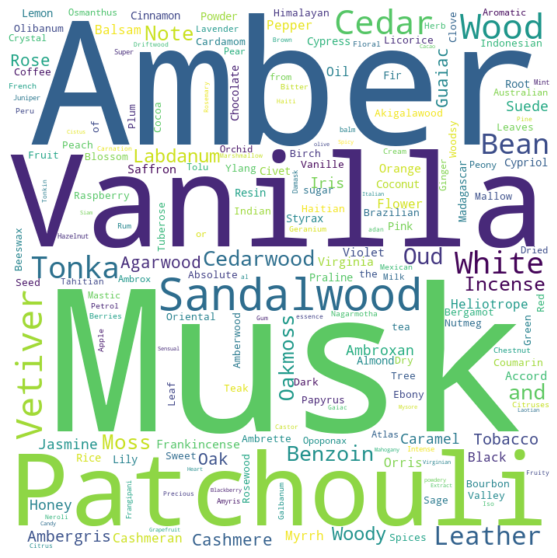

In [110]:
from wordcloud import WordCloud

note_str = ','.join(str(v) for v in df_perfumes_NEW["Base_note"])

notesWordcloud = WordCloud(width=700, height=700, margin=2, background_color='white',
                     stopwords=["Unknown","nan"], collocations=False).generate(note_str)

plt.figure(figsize=(10,10))
plt.imshow(notesWordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

Text(0, 0.5, 'Total Number of Perfumes')

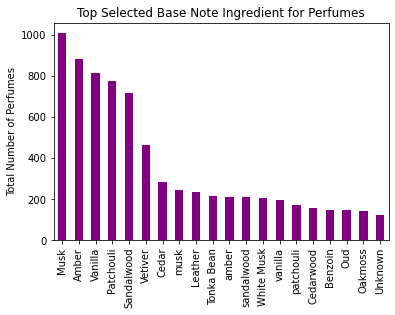

In [111]:
base_notes_list = [notes.split(', ') for notes in df_perfumes_NEW['Base_note'] if type(notes) != float]
list_ingredient = [item for sublist in base_notes_list  for item in sublist]
list_ingredient = [string.strip() for string in list_ingredient]

pd.Series(list_ingredient).value_counts().nlargest(20).plot.bar(color = 'purple')
plt.title("Top Selected Base Note Ingredient for Perfumes")
plt.ylabel("Base Note Ingredient")
plt.ylabel("Total Number of Perfumes")

In [ ]:
#Convert Rate and Rating-Count to Int 

df_perfumes_NEW=df_perfumes_NEW.astype('Rating_count')



<AxesSubplot:>

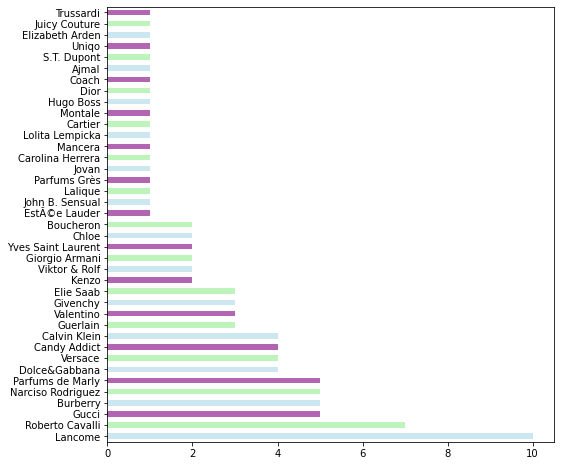

In [123]:
Women_Top=df_perfumes_NEW[(df_perfumes_NEW.Gender == 'Women') & (df_perfumes_NEW.Rate >= '4') & (df_perfumes_NEW.Rating_count >= '10')]
#Women_Top['Brand'].value_counts().plot(kind = 'barh', figsize = (5,5), title = 'best liked by Women');

Women_Top['Brand'].value_counts().plot(kind = 'barh', subplots = False, figsize = (8,8),color=['lightblue','lightgreen','purple'], alpha = .6)



ConversionError: Failed to convert value(s) to axis units: 'No-Rate'

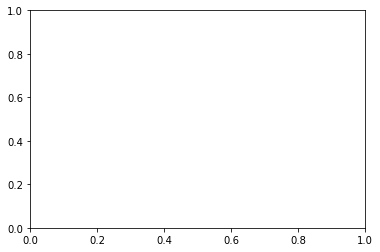

In [95]:
#setting the axes
axes = plt.axes()
axes.set_xlim([0,(df_perfumes_NEW['Rate'].max())])
#making histogram with 20 bins
plt.hist('Rate', data = df_perfumes_NEW, bins = 20)
plt.xlabel('Num Reviews')
plt.ylabel('Quantity')
plt.title('Rating Distribution')

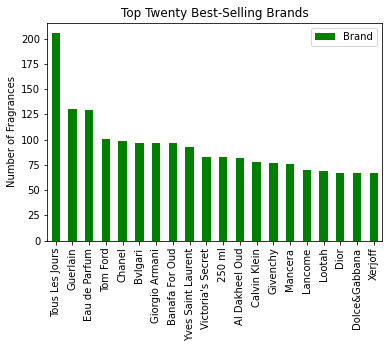

In [48]:
s = pd.DataFrame(df_perfumes['Brand'].value_counts().nlargest(20))
s.plot.bar(color = 'green')
plt.title('Top Twenty Best-Selling Brands')
plt.ylabel('Number of Fragrances')
s = s.reset_index()
s.columns = ['brand', 'count']